In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from pygal.maps.world import World
from IPython.display import SVG, display
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

# A customer segmentation exercise

The data we use is originally from [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python). We start off by importing the data.

In [2]:
customers=pd.read_csv("mall_customers.csv")
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


We remove the customer ID, since this doesn't hold any relevant information:

In [3]:
customers=customers.drop(columns=["CustomerID"])

We can only work with numerical variables, so let's one-hot-encode the gender:

In [4]:
customers = pd.get_dummies(customers,drop_first=True,columns=['Gender'])

Finally, we note the very different scales. Scaling would be one way, but given that we also have the binary gender variable, it may be more sensible to only normalize:

In [5]:
min_max_scaler = preprocessing.MinMaxScaler()
customers = pd.DataFrame(min_max_scaler.fit_transform(customers.values), columns=customers.columns, index=customers.index)
customers

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


## Using hierarchical clustering on the customers

1. Using `scipy`, create a dendrogram `Z` with `linkage(customers,method="average")`, then visualize it with `dendogram(Z)`. How many clusters do you think we should use?

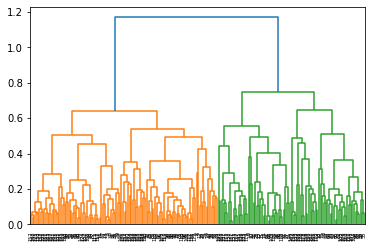

In [7]:
Z = linkage(customers,method='average')
dendrogram(Z)
plt.show()

2. Repeat the process using `method="ward"`. How many clusters do you think we should use in this case?

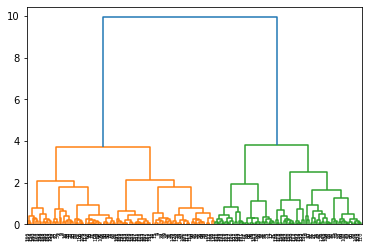

In [8]:
Z = linkage(customers,method='ward')
dendrogram(Z)
plt.show()

3. We take 4 clusters. Using the code below, we obtain the labels for the data and add them to the `customers` dataframe to obtain `customers_hier`. We then plot the average value of the scores taken on for each feature in that cluster and put this into a heatmap to better visualize. What kind of clusters appear?

In [9]:
labels=fcluster(Z, 4, criterion='maxclust') 

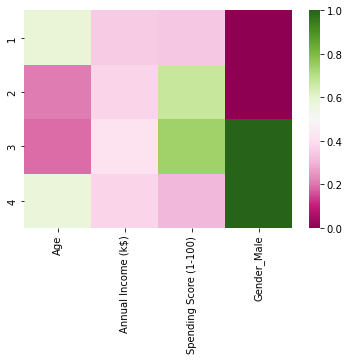

In [10]:
customers_hier=customers.copy()
customers_hier["Labels"]=labels

customers_hier=customers_hier.groupby(customers_hier["Labels"]).mean().reset_index()
customers_hier=customers_hier.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(customers_hier,cmap="PiYG")
plt.show()

4. Instead of just plotting the average values, we can draw a snake plot that also includes the range of values around the mean. For this, we need to "melt" the dataframe, that is, we need to have all attribute values in a single column, with an additional column specifying the attribute to which the value belongs

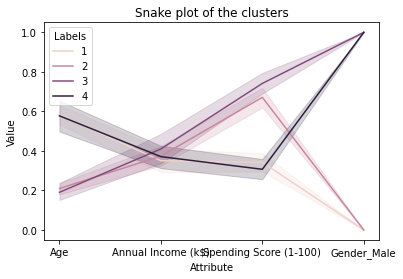

In [11]:
customers_hier=customers.copy()
customers_hier["Labels"]=labels
customers_hier_melt = pd.melt(customers_hier.reset_index(),
                            id_vars=['Labels'],
                            value_vars=['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male'],
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=customers_hier_melt)
plt.show()

## Using K-means clustering on the customers

5. Use `KMeans()` instead with `n_clusters=4`. Call this model `kmeans` and fit it to the `customers` data.
From our `kmeans` model, we get the labels with `kmeans.labels_`. Use this to create a similar heatmap and snakeplot. Do the clusters obtained show similarities?

In [14]:
kmeans = KMeans(n_clusters=4).fit(customers)
kmeans.labels_

array([1, 1, 0, 2, 2, 2, 0, 2, 3, 2, 3, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 3, 2, 3, 1, 0, 2, 0, 2, 0, 2, 0, 1, 3, 2,
       0, 2, 0, 2, 2, 2, 0, 1, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 0, 0, 3, 1,
       0, 0, 1, 2, 3, 0, 0, 0, 3, 1, 0, 3, 2, 0, 3, 1, 3, 0, 2, 3, 0, 2,
       2, 0, 0, 1, 3, 0, 2, 1, 0, 2, 3, 1, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
       3, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 3, 1, 3, 1, 3, 1,
       2, 2, 3, 2, 0, 1, 3, 2, 0, 1, 2, 2, 3, 1, 3, 2, 0, 1, 3, 1, 0, 2,
       0, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 0, 1, 3, 1, 3, 1, 0, 2,
       3, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 1, 0, 2, 0, 2, 3, 2, 0, 2, 0, 1,
       3, 1])

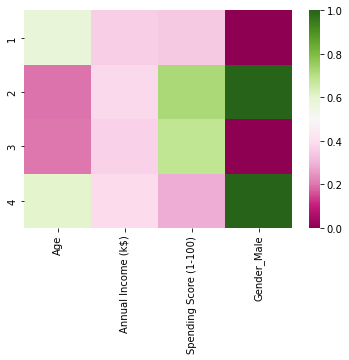

In [15]:
customers_hier=customers.copy()
customers_hier["Labels"]=kmeans.labels_

customers_hier=customers_hier.groupby(customers_hier["Labels"]).mean().reset_index()
customers_hier=customers_hier.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(customers_hier,cmap="PiYG")
plt.show()

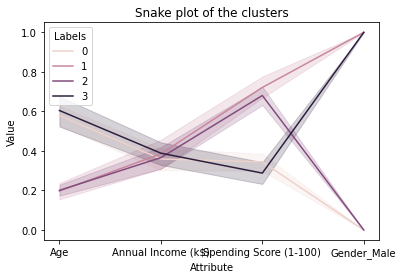

In [16]:
customers_hier=customers.copy()
customers_hier["Labels"]=kmeans.labels_
customers_hier_melt = pd.melt(customers_hier.reset_index(),
                            id_vars=['Labels'],
                            value_vars=['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male'],
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=customers_hier_melt)
plt.show()

6. In K-means clustering, we usually look at inertia to see how many clusters to choose. The inertia measures the sum of distances between each point and the centroid of its cluster. Run the code below to find out how inertia changes with the number of clusters. How many clusters would you pick? Why do you think it's not a good idea to go for the number of clusters which gives the smallest inertia?

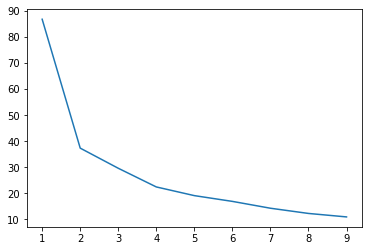

In [17]:
inertia_K=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(customers)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

## Developing a targeted marketing campaign

7. Run again the code with K-means clustering and four clusters. Based on this, together with an overview of the size of the different clusters (below), what marketing strategy would you suggest to the mall provider?

In [18]:
kmeans = KMeans(n_clusters=4).fit(customers)

In [ ]:
sns.histplot(customers_km['Labels'])
plt.show()